In [96]:
import pandas as pd
import matplotlib.pyplot as plt

In [155]:
# Baca data dari file CSV
file_path1 = 'output_arena1_base&delta.csv'  # Ganti dengan path ke file CSV Anda
file_path2 = 'output_arena1_delta.csv'
data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)

# Visualisasi Perjalanan Robot

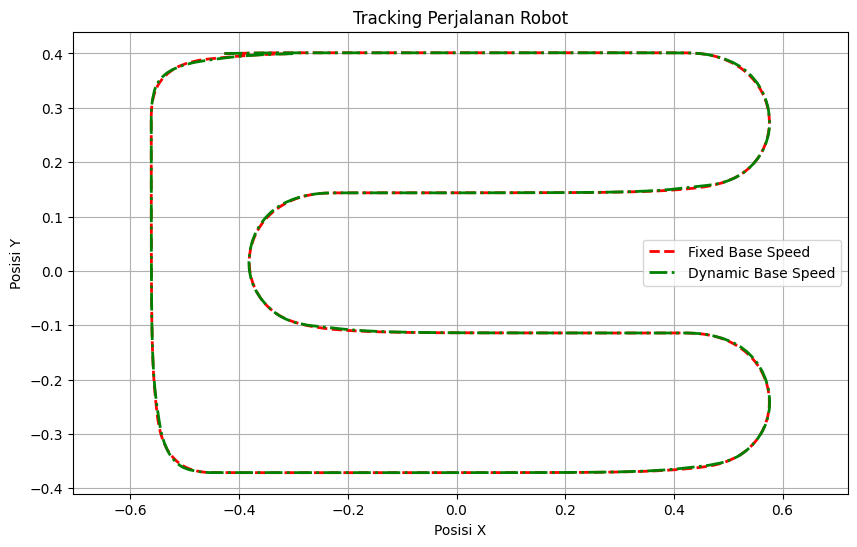

In [173]:
# Plot posisi X dan Y
plt.figure(figsize=(10, 6))
plt.plot(data1['X'], data1['Y'], linestyle='dashed', color='r', linewidth=2)
plt.plot(data2['X'], data2['Y'], linestyle='dashdot', color='g', linewidth=2)
plt.title('Tracking Perjalanan Robot')
plt.xlabel('Posisi X')
plt.ylabel('Posisi Y')
plt.legend(['Fixed Base Speed', 'Dynamic Base Speed']) 
plt.grid(True)
plt.axis('equal')  # Membuat skala pada sumbu X dan Y sama besarnya
plt.show()

# Analisis Kinerja PID Controller

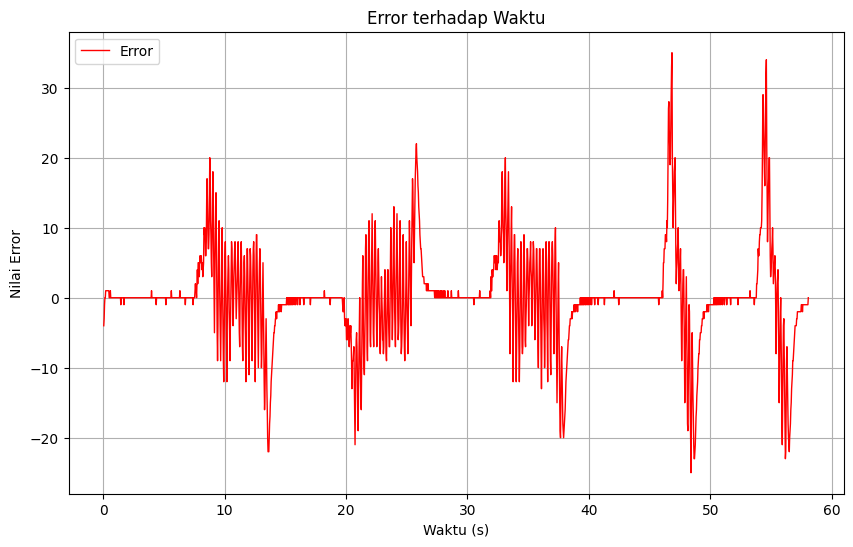

In [130]:
# Plot Error dan DeltaError terhadap waktu
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Error'], label='Error', color='r', linewidth=1)
#plt.plot(data['Time'], data['IntegralError'], label='IntegralError', color='g', linewidth=1)
#plt.plot(data['Time'], data['DeltaError'], label='DeltaError', color='b', linewidth=1)
#plt.title('Error, IntegralError dan DeltaError terhadap Waktu')
plt.title('Error terhadap Waktu')
plt.xlabel('Waktu (s)')
plt.ylabel('Nilai Error')
plt.legend()
plt.grid(True)
plt.show()

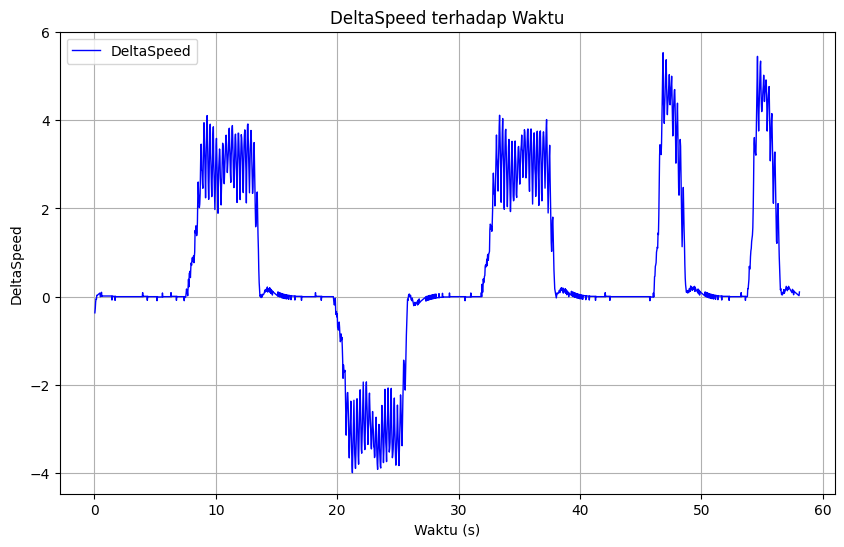

In [131]:
# Plot DeltaSpeed terhadap waktu
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['DeltaSpeed'], label='DeltaSpeed', color='b', linewidth=1)
plt.title('DeltaSpeed terhadap Waktu')
plt.xlabel('Waktu (s)')
plt.ylabel('DeltaSpeed')
plt.legend()
plt.grid(True)
plt.show()

## Mean Absolute Error (MAE)

In [132]:
mae = data['Error'].abs().mean()
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 3.7305785123966944


## Mean Squared Error (MSE)

In [133]:
mse = (data['Error'] ** 2).mean()
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 44.3267217630854


## Root Mean Squared Error (RMSE)

In [134]:
rmse = mse ** 0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 6.657831611199355


## Mean Absolute Percentage Error (MAPE)

In [135]:
mape = (data['Error'].abs() / data['SetPointError']).mean() * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Percentage Error (MAPE): 2.33%


In [136]:
# Hitung metrik error
mae = data['Error'].abs().mean()
mse = (data['Error'] ** 2).mean()
rmse = mse ** 0.5
mape = (data['Error'].abs() / data['SetPointError']).mean() * 100

# Cetak hasil
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Error (MAE): 3.7305785123966944
Mean Squared Error (MSE): 44.3267217630854
Root Mean Squared Error (RMSE): 6.657831611199355
Mean Absolute Percentage Error (MAPE): 2.33%


# Analisis respon transien

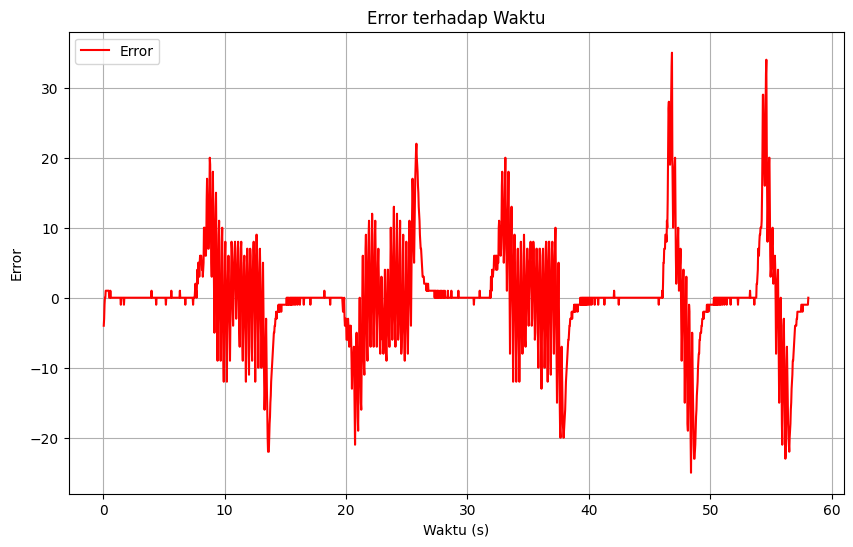

Rise Time: 8.544 s
Peak Time: 46.848 s
Overshoot: -78.12 %
Settling Time: 0.064 s


In [137]:
# Plot respons Error terhadap waktu
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Error'], label='Error', color='r')
plt.title('Error terhadap Waktu')
plt.xlabel('Waktu (s)')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()

# Analisis respons transien
def analyze_transient_response(time, error, set_point):
    error_abs = error.abs()
    
    rise_time_idx = (error_abs > 0.1 * set_point).idxmax()
    rise_time = time[rise_time_idx]

    peak_error = error.max()
    peak_time_idx = error.idxmax()
    peak_time = time[peak_time_idx]

    overshoot = ((peak_error - set_point) / set_point) * 100

    settling_time_idx = (error_abs <= 0.02 * set_point).idxmax()
    settling_time = time[settling_time_idx]

    return rise_time, peak_time, overshoot, settling_time

set_point = data['SetPointError'].iloc[0]  # Misalkan set point konstan
time = data['Time']
error = data['Error']

rise_time, peak_time, overshoot, settling_time = analyze_transient_response(time, error, set_point)

print(f'Rise Time: {rise_time} s')
print(f'Peak Time: {peak_time} s')
print(f'Overshoot: {overshoot:.2f} %')
print(f'Settling Time: {settling_time} s')

# Analisis Kecepatan Roda

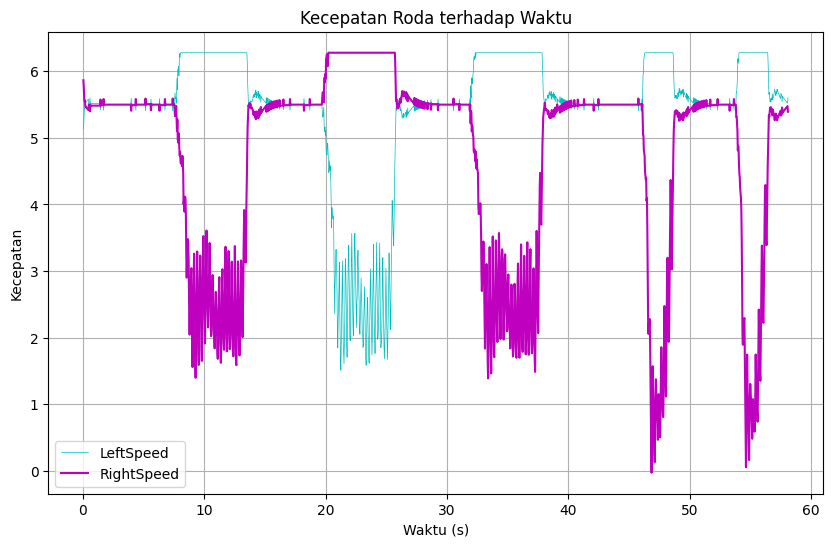

In [138]:
# Plot kecepatan roda kiri dan kanan terhadap waktu
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['LeftSpeed'], label='LeftSpeed', color='c', linewidth=0.5)
plt.plot(data['Time'], data['RightSpeed'], label='RightSpeed', color='m')
plt.title('Kecepatan Roda terhadap Waktu')
plt.xlabel('Waktu (s)')
plt.ylabel('Kecepatan')
plt.legend()
plt.grid(True)
plt.show()

# Analisis Orientasi Robot

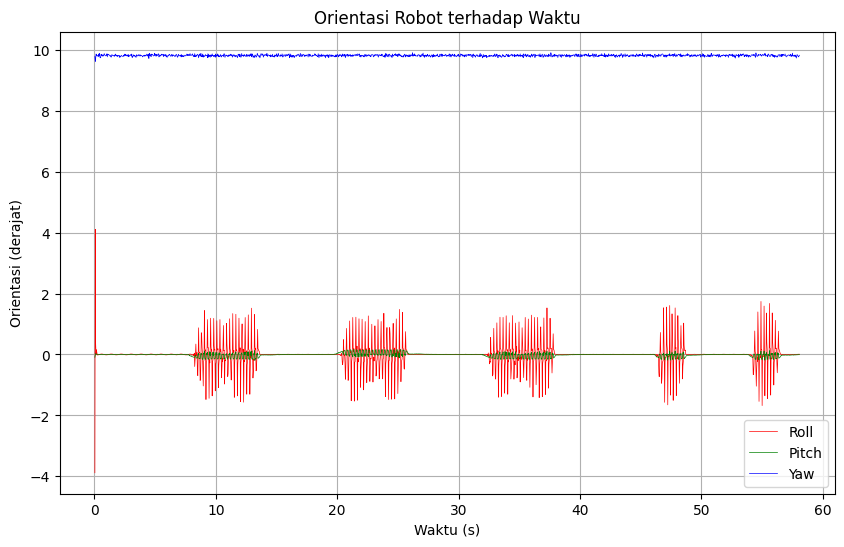

In [139]:
# Plot Roll, Pitch, dan Yaw terhadap waktu
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Roll'], label='Roll', color='r', linewidth=0.5)
plt.plot(data['Time'], data['Pitch'], label='Pitch', color='g', linewidth=0.5)
plt.plot(data['Time'], data['Yaw'], label='Yaw', color='b', linewidth=0.5)
plt.title('Orientasi Robot terhadap Waktu')
plt.xlabel('Waktu (s)')
plt.ylabel('Orientasi (derajat)')
plt.legend()
plt.grid(True)
plt.show()

# Analisis Korelasi

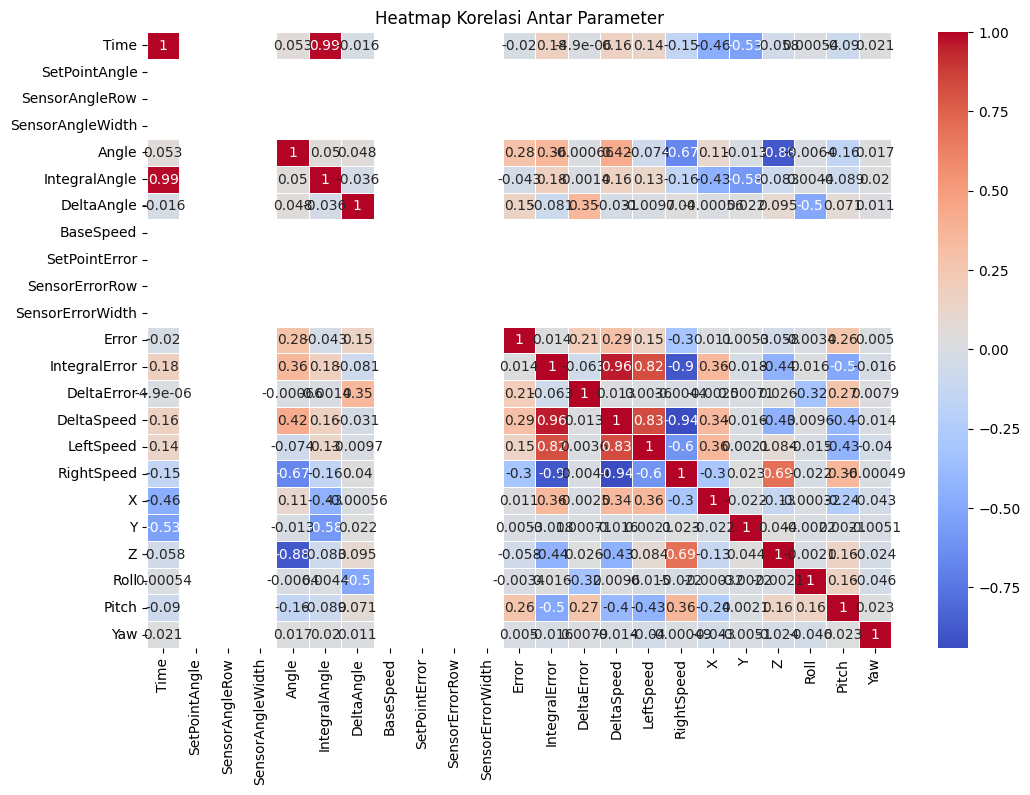

In [140]:
import seaborn as sns

# Hitung matriks korelasi
correlation_matrix = data.corr()

# Plot heatmap dari matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Parameter')
plt.show()

# Analisis Stabilitas

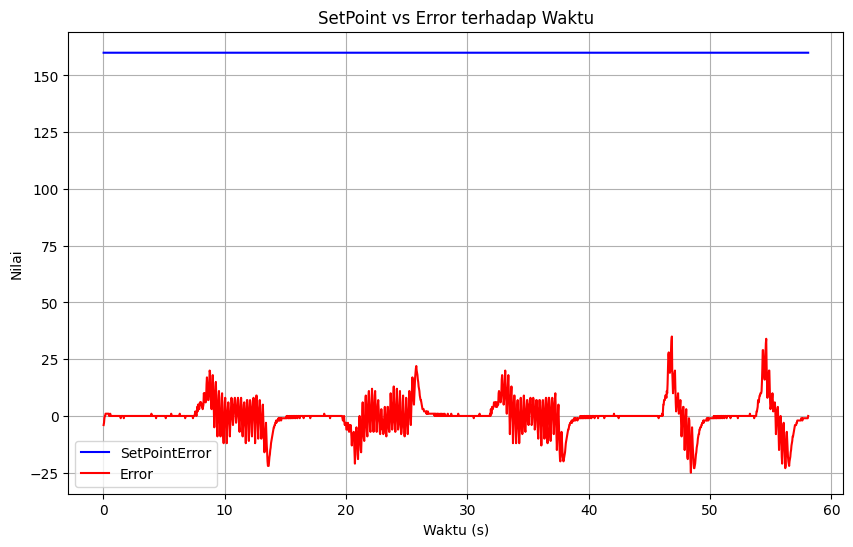

In [141]:
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['SetPointError'], label='SetPointError', color='b')
plt.plot(data['Time'], data['Error'], label='Error', color='r')
plt.title('SetPoint vs Error terhadap Waktu')
plt.xlabel('Waktu (s)')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.show()

# Analisis Kinerja Dinamis

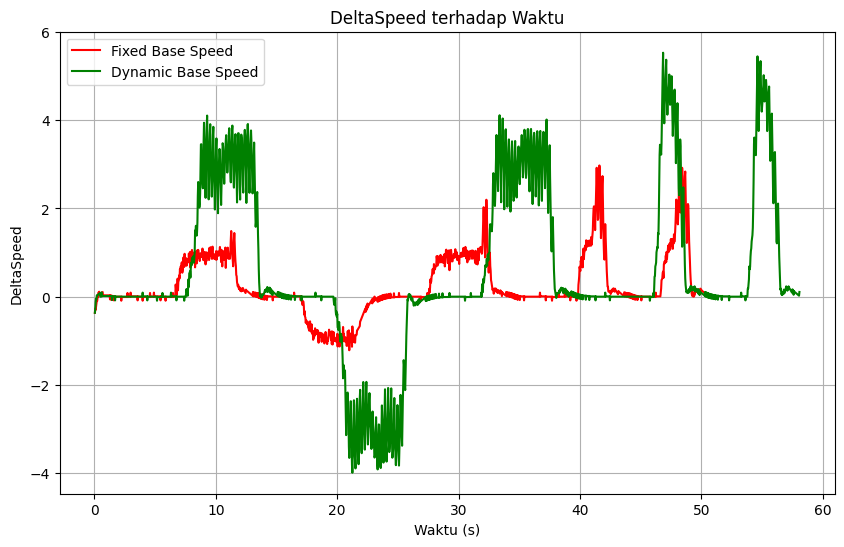

In [174]:
# Plot DeltaSpeed terhadap waktu
plt.figure(figsize=(10, 6))
plt.plot(data1['Time'], data1['DeltaSpeed'], label='Fixed Base Speed', color='r')
plt.plot(data2['Time'], data2['DeltaSpeed'], label='Dynamic Base Speed', color='g')
plt.title('DeltaSpeed terhadap Waktu')
plt.xlabel('Waktu (s)')
plt.ylabel('DeltaSpeed')
plt.legend(['Fixed Base Speed', 'Dynamic Base Speed']) 
plt.grid(True)
plt.show()

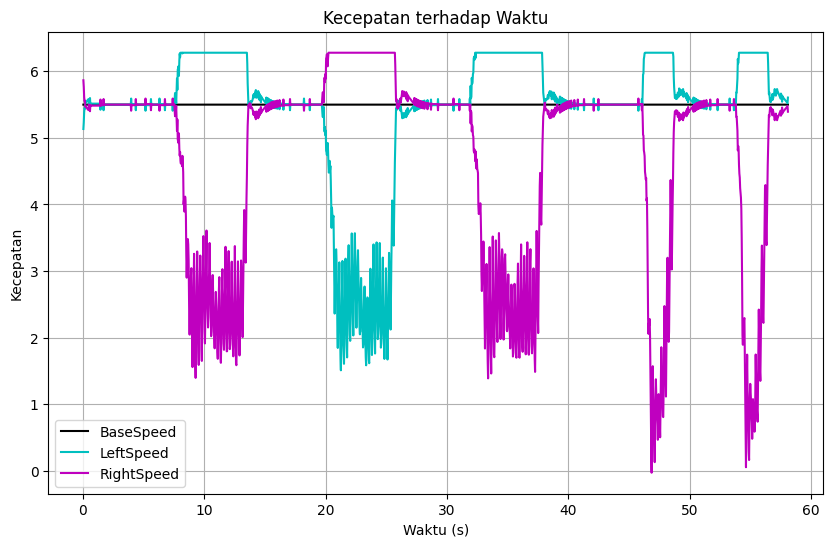

In [143]:
# Plot BaseSpeed, LeftSpeed, dan RightSpeed terhadap waktu
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['BaseSpeed'], label='BaseSpeed', color='k')
plt.plot(data['Time'], data['LeftSpeed'], label='LeftSpeed', color='c')
plt.plot(data['Time'], data['RightSpeed'], label='RightSpeed', color='m')
plt.title('Kecepatan terhadap Waktu')
plt.xlabel('Waktu (s)')
plt.ylabel('Kecepatan')
plt.legend()
plt.grid(True)
plt.show()

# Analisis Konsistensi Kontrol

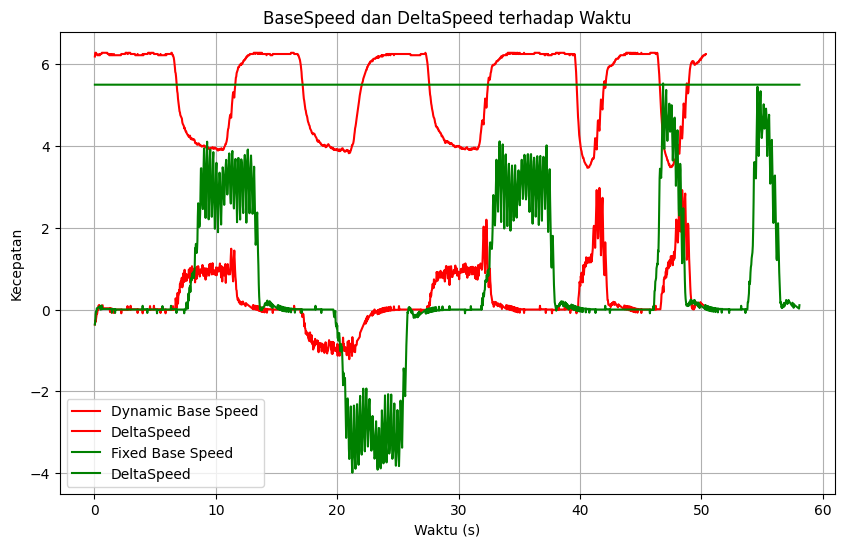

In [175]:
# Plot BaseSpeed dan DeltaSpeed terhadap waktu
plt.figure(figsize=(10, 6))
plt.plot(data1['Time'], data1['BaseSpeed'], label='Dynamic Base Speed', color='r')
plt.plot(data1['Time'], data1['DeltaSpeed'], label='DeltaSpeed', color='r')
plt.plot(data2['Time'], data2['BaseSpeed'], label='Fixed Base Speed', color='g')
plt.plot(data2['Time'], data2['DeltaSpeed'], label='DeltaSpeed', color='g')
plt.title('BaseSpeed dan DeltaSpeed terhadap Waktu')
plt.xlabel('Waktu (s)')
plt.ylabel('Kecepatan')
plt.legend()
plt.grid(True)
plt.show()

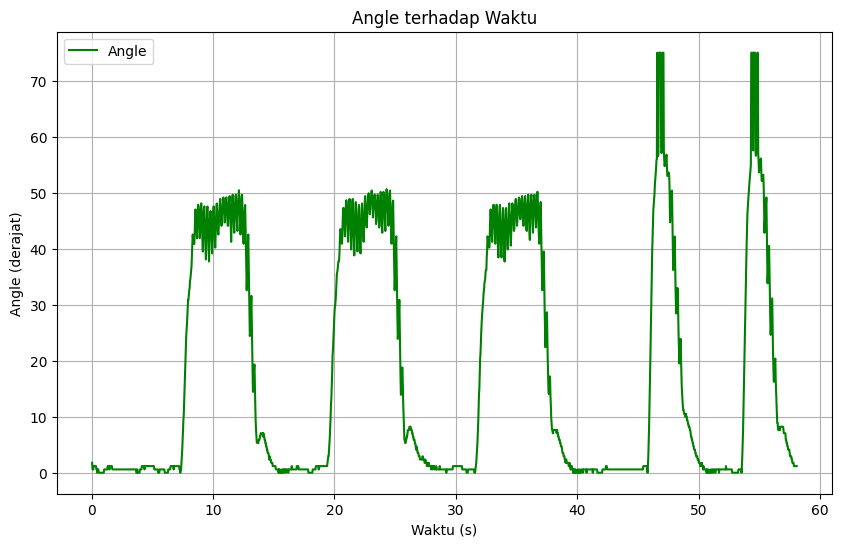

In [145]:
# Plot Angle terhadap waktu
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Angle'], label='Angle', color='g')
plt.title('Angle terhadap Waktu')
plt.xlabel('Waktu (s)')
plt.ylabel('Angle (derajat)')
plt.legend()
plt.grid(True)
plt.show()

# Analisis Distribusi Error

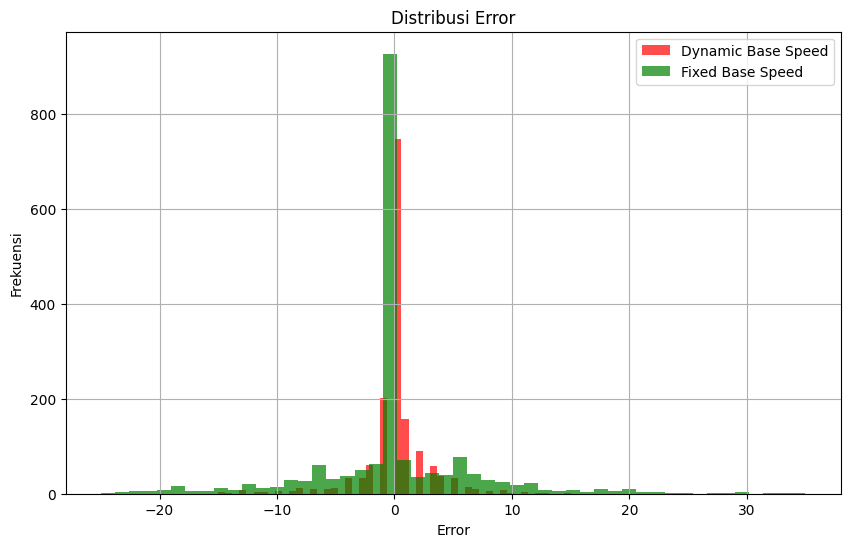

In [179]:
plt.figure(figsize=(10, 6))
plt.hist(data1['Error'], bins=50, color='r', alpha=0.7, label='Dynamic Base Speed')
plt.hist(data2['Error'], bins=50, color='g', alpha=0.7, label='Fixed Base Speed')
plt.title('Distribusi Error')
plt.xlabel('Error')
plt.ylabel('Frekuensi')
plt.legend()
plt.grid(True)
plt.show()

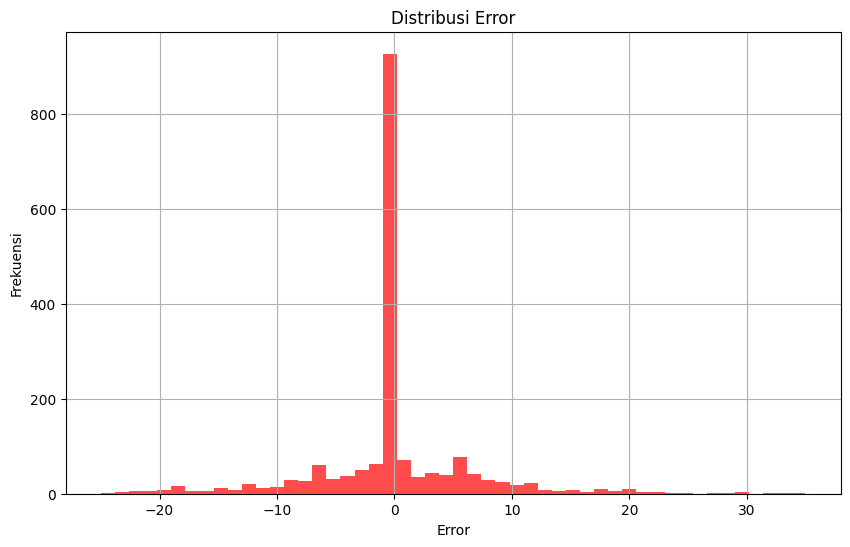

In [177]:
plt.figure(figsize=(10, 6))
plt.hist(data2['Error'], bins=50, color='r', alpha=0.7)
plt.title('Distribusi Error')
plt.xlabel('Error')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()